In [1]:
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import itertools
import string
import io
import re

In [2]:
pd.options.display.max_colwidth=500
data = pd.read_csv ('CBKmdr2020.csv')
df = pd.DataFrame(data)

In [3]:
col = ['Device_Problems', 'Event_description','Narrative']
df = df[col]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11083 entries, 0 to 11082
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Device_Problems    11079 non-null  object
 1   Event_description  11076 non-null  object
 2   Narrative          6923 non-null   object
dtypes: object(3)
memory usage: 259.9+ KB


In [5]:
df.head()

,Device_Problems,Event_description,Narrative
0,Inappropriate or Unexpected Reset (2959),The hospital reported that the unit would restart on its own. There was no report of patient involvement.,The switching board and power supply board were replaced to resolve the reported issue. No report of patient involvement. Date of device manufacture was unavailable at time of mdr filing.
1,Failure to Calibrate (2440),It was reported to resmed that an astral device failed to complete its internal self-test. There was no patient harm or serious injury reported as a result of this incident.,The device was returned to resmed and an evaluation confirmed the complaint. The non-return valve (nrv) assembly was replaced to address this issue. The device was serviced and fully tested before it was returned to the customer. Resmed's risk analysis for this failure mode concludes that the risk is acceptable. Resmed reference #: (b)(4).
2,Failure to Calibrate (2440),It was reported to resmed that an astral device failed to complete its internal self-test. There was no patient harm or serious injury reported as a result of this incident.,The device was returned to resmed and an evaluation confirmed the complaint. The non-return valve (nrv) assembly was replaced to address this issue. The device was serviced and fully tested before it was returned to the customer. Resmed's risk analysis for this failure mode concludes that the risk is acceptable. (b)(4).
3,Failure to Charge (1085),It was reported to resmed that an astral device failed to charge. There was no patient harm or serious injury reported as a result of this incident.,The device was returned to an authorized resmed third party service center for an evaluation and service. The customer was issued with a replacement main circuit board as part of a warranty claim. Resmed's risk analysis for these failure modes concludes that the risk is acceptable. (b)(4).
4,Failure to Charge (1085),It was reported to resmed that an astral device failed to charge. There was no patient harm or serious injury reported as a result of this incident.,The device was returned to an authorized resmed third party service center for an evaluation and service. The customer was issued with a replacement main circuit board as part of a warranty claim. Resmed's risk analysis for these failure modes concludes that the risk is acceptable. Resmed reference #: (b)(4).


In [6]:
print('Num_D_problems:',len(pd.DataFrame(df.Device_Problems.value_counts())))
pd.DataFrame(df.Device_Problems.value_counts())

Num_D_problems: 745


,Device_Problems
Mechanical Problem (1384),2036
Output Problem (3005),738
Circuit Failure (1089),698
Failure to Recalibrate (1517),605
Failure of Device to Self-Test (2937),429
...,...
Power Problem (3010); Therapeutic or Diagnostic Output Failure (3023),1
Electrical /Electronic Property Problem (1198); Application Program Problem (2880),1
Leak/Splash (1354); Infusion or Flow Problem (2964),1
Use of Device Problem (1670); Improper Flow or Infusion (2954),1


In [7]:
re_Parenthesis_list =["Device_Problems"]
re_Apostrophe_list =["Event_description","Narrative"]
strip_list =["Device_Problems"]
# regex to remove the Parenthesis 
for i in range(0, len(re_Parenthesis_list)):
    df[re_Parenthesis_list[i]] = df[re_Parenthesis_list[i]].replace({'\([^()]*\)':''}, regex=True)
    df[re_Parenthesis_list[i]] = df[re_Parenthesis_list[i]].str.lower()
# regex to remove the Apostrophe
for i in range(0, len(re_Apostrophe_list)):
    df[re_Apostrophe_list[i]] = df[re_Apostrophe_list[i]].replace({'(?<=[a-z])\'(?=[a-z])':''}, regex=True)
#To remove white space at both ends
for i in range(0, len(strip_list)):
    df[strip_list[i]]= df[strip_list[i]].str.strip()

In [8]:
print('Num_D_problems:',len(pd.DataFrame(df.Device_Problems.value_counts())))
pd.DataFrame(df.Device_Problems.value_counts())

Num_D_problems: 745


,Device_Problems
mechanical problem,2036
output problem,738
circuit failure,698
failure to recalibrate,605
failure of device to self-test,429
...,...
failure to sense,1
thermal decomposition of device ; no display/image ; failure to power up,1
computer software problem ; insufficient information,1
failure to charge ; circuit failure ; failure to recalibrate ; battery problem,1


In [9]:
df.head()

,Device_Problems,Event_description,Narrative
0,inappropriate or unexpected reset,The hospital reported that the unit would restart on its own. There was no report of patient involvement.,The switching board and power supply board were replaced to resolve the reported issue. No report of patient involvement. Date of device manufacture was unavailable at time of mdr filing.
1,failure to calibrate,It was reported to resmed that an astral device failed to complete its internal self-test. There was no patient harm or serious injury reported as a result of this incident.,The device was returned to resmed and an evaluation confirmed the complaint. The non-return valve (nrv) assembly was replaced to address this issue. The device was serviced and fully tested before it was returned to the customer. Resmeds risk analysis for this failure mode concludes that the risk is acceptable. Resmed reference #: (b)(4).
2,failure to calibrate,It was reported to resmed that an astral device failed to complete its internal self-test. There was no patient harm or serious injury reported as a result of this incident.,The device was returned to resmed and an evaluation confirmed the complaint. The non-return valve (nrv) assembly was replaced to address this issue. The device was serviced and fully tested before it was returned to the customer. Resmeds risk analysis for this failure mode concludes that the risk is acceptable. (b)(4).
3,failure to charge,It was reported to resmed that an astral device failed to charge. There was no patient harm or serious injury reported as a result of this incident.,The device was returned to an authorized resmed third party service center for an evaluation and service. The customer was issued with a replacement main circuit board as part of a warranty claim. Resmeds risk analysis for these failure modes concludes that the risk is acceptable. (b)(4).
4,failure to charge,It was reported to resmed that an astral device failed to charge. There was no patient harm or serious injury reported as a result of this incident.,The device was returned to an authorized resmed third party service center for an evaluation and service. The customer was issued with a replacement main circuit board as part of a warranty claim. Resmeds risk analysis for these failure modes concludes that the risk is acceptable. Resmed reference #: (b)(4).


In [10]:
Calibration_Problems=['failure of device to self-test','Failure to calibrate','Calibration Problem',
                      'failure to calibrate ; battery problem',
                      'Protective Measures Problem','failure to recalibrate',
                      'Failure to device to self-test','Failure to Read Input Signal','Volume Accuracy Problem',
                     'Failure to Align']
Software_Problems=['computer software','device displays incorrect message ; unexpected shutdown',
                   'computer software problem',
                   'Inadequate user interface','computer operating system problem',
                  'Application Program Problem']

Power_Problems=['battery problem','failure to charge','battery problem ; protective measures problem ; unexpected shutdown',
                'overheating of device ; battery problem','failure to power up',
                'ailure to power up','premature discharge of battery','Loss of Power',
                'Complete Loss Of Power','Failure to Run on Battery','Aborted Charge','power problem','charging problem']
                

Mechanical_Problems=['Mechanical Problem','contamination ; mechanical problem','Detachment Of Device Or Device Component',
                     'contamination ; mechanical problem',
                     'Mechanical Problem','Mechanics Altered','Material Erosion',
                     'mechanical problem ; failure to recalibrate',
                     'gas output problem ; decreased pump speed ; failure to deliver ; no pressure',
                     'mechanical problem ; failure of device to self-test',
                     'Device Fell','Material Rupture','Inaccurate Delivery','Failure to Deliver','No flow',
                     'Unintended Collision','Physical Resistance/Sticking','Obstruction of Flow','Failure to Cycle',
                     'Insufficient Flow or Under Infusion']

In [11]:
Circuit_failure=['output problem','communication or transmission problem','No display image','no display/image',
                 'Erratic or intermittent display','Poor Quality Image',
                 'Defective component','circuit failure','device displays incorrect message',
                 'failure to charge ; circuit failure ; battery problem','no audible alarm'
                 'failure to charge ; failure to recalibrate ; battery problem',
                 'erratic or intermittent display ; device displays incorrect message',
                 'thermal decomposition of device ; failure to power up ; battery problem','no flow ; output problem',
                 'display or visual feedback problem ; improper flow or infusion',
                 'incorrect, inadequate or imprecise resultor readings','use of device problem',
                 'therapeutic or diagnostic output failure','no audible alarm', 
                'output problem','Incorrect, in adequate or imprecise resultor Reading','Device displays incorrect massage',
                'Image Display Error/Artifact','Defective device','Unable to Obtain Readings',
                 'Display or Visual Feedback Problem','Disconnection','Data Problem','Break',
                 'erratic or intermittent display ; no flow',
                 'Noise, Audible','Unexpected Shutdown','Device Alarm System','Protective Measures Problem',
                 'Low Readings','Electro-Static Discharge','Component Missing','Electrical Shorting',
                 'Tidal Volume Fluctuations','Smoking','Improper Flow or Infusion','No Tactile Prompts/Feedback',
                 'Connection Problem','Leak/Splash','Display Difficult to Read','High Readings',
                 'Inappropriate or Unexpected Reset','Appropriate Term/Code Not Available','Contamination',
                 'Insufficient Information','Infusion or Flow Problem','Temperature Problem','Activation Problem',
                 'Tactile Prompts/Feedback','Image Display Error/Artifact','Environmental Compatibility Problem']

In [12]:
red_DP_list=[Calibration_Problems,Software_Problems,Circuit_failure,Power_Problems,Mechanical_Problems]
red_DP_list_lower=[Calibration_Problems,Software_Problems,Circuit_failure,Power_Problems,Mechanical_Problems]
for i in range(0, len(red_DP_list)):
    #df[strip_list[i]]= df[strip_list[i]].str.strip()
    series=pd.Series(red_DP_list[i]).str.strip()
    red_DP_list_lower[i] = list(series.str.lower()) 
    #red_DP_list_lower[i].str.strip()
print(red_DP_list_lower)

[['failure of device to self-test', 'failure to calibrate', 'calibration problem', 'failure to calibrate ; battery problem', 'protective measures problem', 'failure to recalibrate', 'failure to device to self-test', 'failure to read input signal', 'volume accuracy problem', 'failure to align'], ['computer software', 'device displays incorrect message ; unexpected shutdown', 'computer software problem', 'inadequate user interface', 'computer operating system problem', 'application program problem'], ['output problem', 'communication or transmission problem', 'no display image', 'no display/image', 'erratic or intermittent display', 'poor quality image', 'defective component', 'circuit failure', 'device displays incorrect message', 'failure to charge ; circuit failure ; battery problem', 'no audible alarmfailure to charge ; failure to recalibrate ; battery problem', 'erratic or intermittent display ; device displays incorrect message', 'thermal decomposition of device ; failure to power 

In [13]:
df['Device_Problems']= df['Device_Problems'].str.strip()
Names_red_DP_list=['Calibration_Problems','Software_Problems','Circuit_failure','Power_Problems','Mechanical_Problems']
for i in range(0, len(red_DP_list_lower)):
    df.Device_Problems= df.Device_Problems.replace(red_DP_list_lower[i],Names_red_DP_list[i])
print('Number_Of_Device_Problems =',len(pd.DataFrame(df.Device_Problems.value_counts())))
(pd.DataFrame(df.Device_Problems.value_counts()))

Number_Of_Device_Problems = 660


,Device_Problems
Circuit_failure,3450
Mechanical_Problems,2360
Calibration_Problems,1797
Power_Problems,831
Software_Problems,160
...,...
device displays incorrect message ; difficult to open or close,1
defective component ; protective measures problem,1
failure to charge ; contamination /decontamination problem ; no flow ; power problem,1
failure to charge ; mechanical problem,1


In [14]:
Calibration_df=df.where(df['Device_Problems'] == 'Calibration_Problems').dropna()
Software_df=df.where(df['Device_Problems'] == 'Software_Problems').dropna()
Circuit_df=df.where(df['Device_Problems'] == 'Circuit_failure').dropna()
Power_df=df.where(df['Device_Problems'] == 'Power_Problems').dropna()
Mechanical_df=df.where(df['Device_Problems'] == 'Mechanical_Problems').dropna()
frames = [Calibration_df,Software_df,Circuit_df,Power_df,Mechanical_df]
for i in range(0, len(frames)):
    print(len(frames[i]))

1186
82
1566
612
1937


In [17]:
Calibration_df=df.where(df['Device_Problems'] == 'Calibration_Problems').dropna()
Software_df=df.where(df['Device_Problems'] == 'Software_Problems').dropna()
Circuit_df=df.where(df['Device_Problems'] == 'Circuit_failure').dropna()
Power_df=df.where(df['Device_Problems'] == 'Power_Problems').dropna()
Mechanical_df=df.where(df['Device_Problems'] == 'Mechanical_Problems').dropna()

frames = [Calibration_df,Software_df,Circuit_df,Power_df,Mechanical_df]

result = pd.concat(frames, ignore_index=True,sort=False)
print(pd.DataFrame(result))

           Device_Problems  \
0     Calibration_Problems   
1     Calibration_Problems   
2     Calibration_Problems   
3     Calibration_Problems   
4     Calibration_Problems   
...                    ...   
5378   Mechanical_Problems   
5379   Mechanical_Problems   
5380   Mechanical_Problems   
5381   Mechanical_Problems   
5382   Mechanical_Problems   

                                                                                                                                                                                                                                                           Event_description  \
0                                                                                              It was reported to resmed that an astral device failed to complete its internal self-test. There was no patient harm or serious injury reported as a result of this incident.   
1                                                                                              

In [18]:
pd.DataFrame(result).head()

,Device_Problems,Event_description,Narrative
0,Calibration_Problems,It was reported to resmed that an astral device failed to complete its internal self-test. There was no patient harm or serious injury reported as a result of this incident.,The device was returned to resmed and an evaluation confirmed the complaint. The non-return valve (nrv) assembly was replaced to address this issue. The device was serviced and fully tested before it was returned to the customer. Resmeds risk analysis for this failure mode concludes that the risk is acceptable. Resmed reference #: (b)(4).
1,Calibration_Problems,It was reported to resmed that an astral device failed to complete its internal self-test. There was no patient harm or serious injury reported as a result of this incident.,The device was returned to resmed and an evaluation confirmed the complaint. The non-return valve (nrv) assembly was replaced to address this issue. The device was serviced and fully tested before it was returned to the customer. Resmeds risk analysis for this failure mode concludes that the risk is acceptable. (b)(4).
2,Calibration_Problems,It was reported to resmed that an astral device failed to complete its internal self-test. There was no patient harm or serious injury reported as a result of this incident.,The device was returned to resmed and an evaluation confirmed the complaint. The non-return valve (nrv) assembly and sensor circuit board were replaced to address this issue. The device was serviced and fully tested before it was returned to the customer. Resmeds risk analysis for this failure mode concludes that the risk is acceptable. (b)(4).
3,Calibration_Problems,It was reported to resmed that an astral device failed to complete its internal self-test. There was no patient harm or serious injury reported as a result of this incident.,The device was returned to resmed and an evaluation confirmed the complaint. The non-return valve (nrv) assembly and sensor circuit board were replaced to address this issue. The device was serviced and fully tested before it was returned to the customer. Resmeds risk analysis for this failure mode concludes that the risk is acceptable. (b)(4).
4,Calibration_Problems,It was reported to resmed that an astral device displayed an internal battery error message and failed to complete its internal self test. There was no patient harm or serious injury reported as a result of this incident.,The device was returned to resmed and an evaluation confirmed the complaint. The internal battery and pneumatic block was replaced to address this issue. The device was serviced and fully tested before it was returned to the customer. Resmeds risk analysis for this failure mode concludes that the risk is acceptable. Resmed reference #: (b)(4).


In [19]:
result.Device_Problems.value_counts()

Mechanical_Problems     1937
Circuit_failure         1566
Calibration_Problems    1186
Power_Problems           612
Software_Problems         82
Name: Device_Problems, dtype: int64

In [20]:
len(result)

5383

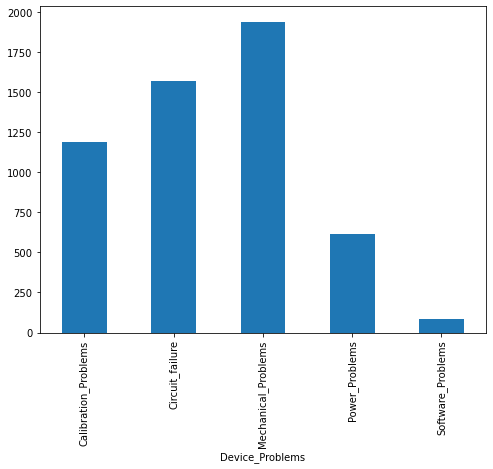

In [21]:
fig = plt.figure(figsize=(8,6))
result.groupby('Device_Problems').Event_description.count().plot.bar(ylim=0)
plt.show()

In [22]:
result["Event_description_Narrative"] = result["Event_description"] + result["Narrative"]
print(len(pd.DataFrame(result)))
result.head()

5383


,Device_Problems,Event_description,Narrative,Event_description_Narrative
0,Calibration_Problems,It was reported to resmed that an astral device failed to complete its internal self-test. There was no patient harm or serious injury reported as a result of this incident.,The device was returned to resmed and an evaluation confirmed the complaint. The non-return valve (nrv) assembly was replaced to address this issue. The device was serviced and fully tested before it was returned to the customer. Resmeds risk analysis for this failure mode concludes that the risk is acceptable. Resmed reference #: (b)(4).,It was reported to resmed that an astral device failed to complete its internal self-test. There was no patient harm or serious injury reported as a result of this incident.The device was returned to resmed and an evaluation confirmed the complaint. The non-return valve (nrv) assembly was replaced to address this issue. The device was serviced and fully tested before it was returned to the customer. Resmeds risk analysis for this failure mode concludes that the risk is acceptable. Resmed ref...
1,Calibration_Problems,It was reported to resmed that an astral device failed to complete its internal self-test. There was no patient harm or serious injury reported as a result of this incident.,The device was returned to resmed and an evaluation confirmed the complaint. The non-return valve (nrv) assembly was replaced to address this issue. The device was serviced and fully tested before it was returned to the customer. Resmeds risk analysis for this failure mode concludes that the risk is acceptable. (b)(4).,It was reported to resmed that an astral device failed to complete its internal self-test. There was no patient harm or serious injury reported as a result of this incident.The device was returned to resmed and an evaluation confirmed the complaint. The non-return valve (nrv) assembly was replaced to address this issue. The device was serviced and fully tested before it was returned to the customer. Resmeds risk analysis for this failure mode concludes that the risk is acceptable. (b)(4).
2,Calibration_Problems,It was reported to resmed that an astral device failed to complete its internal self-test. There was no patient harm or serious injury reported as a result of this incident.,The device was returned to resmed and an evaluation confirmed the complaint. The non-return valve (nrv) assembly and sensor circuit board were replaced to address this issue. The device was serviced and fully tested before it was returned to the customer. Resmeds risk analysis for this failure mode concludes that the risk is acceptable. (b)(4).,It was reported to resmed that an astral device failed to complete its internal self-test. There was no patient harm or serious injury reported as a result of this incident.The device was returned to resmed and an evaluation confirmed the complaint. The non-return valve (nrv) assembly and sensor circuit board were replaced to address this issue. The device was serviced and fully tested before it was returned to the customer. Resmeds risk analysis for this failure mode concludes that the risk...
3,Calibration_Problems,It was reported to resmed that an astral device failed to complete its internal self-test. There was no patient harm or serious injury reported as a result of this incident.,The device was returned to resmed and an evaluation confirmed the complaint. The non-return valve (nrv) assembly and sensor circuit board were replaced to address this issue. The device was serviced and fully tested before it was returned to the customer. Resmeds risk analysis for this failure mode concludes that the risk is acceptable. (b)(4).,It was reported to resmed that an astral device failed to complete its internal self-test. There was no patient harm or serious injury reported as a result of this incident.The device was returned to resmed and an evaluation confirmed the complaint. The non-return valve (nrv) assembly and

In [23]:
result.to_csv('CBK2020transformed.csv')